In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

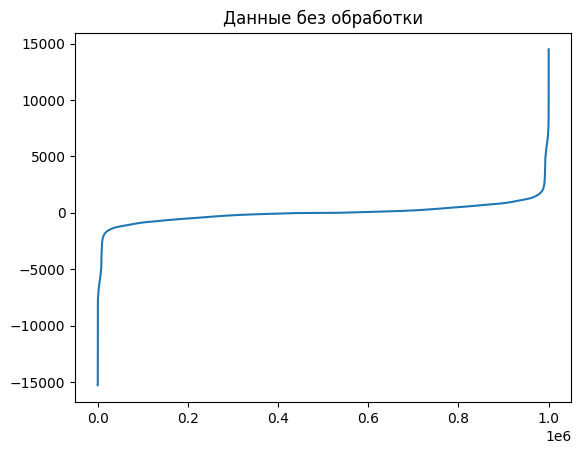

In [ ]:
eval = pd.read_csv("data/random_evals.csv").Evaluation
eval = eval.apply(lambda x: int(x.replace("#", "").replace("\ufeff", "")))
eval = eval.sort_values().to_numpy()

plt.title("Данные без обработки")
_ = plt.plot(eval)

neg: -1192.0
pos: 1217.0


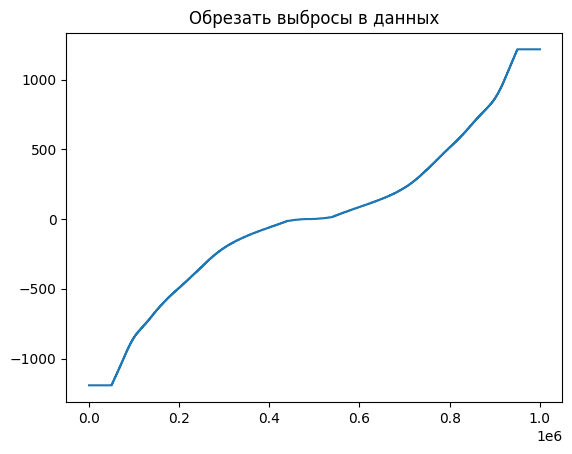

In [ ]:
neg = np.quantile(eval, 0.05)
pos = np.quantile(eval, 0.95)

eval[eval < neg] = neg
eval[eval > pos] = pos

print(f"neg: {neg}")
print(f"pos: {pos}")

plt.title("Обрезать выбросы в данных")
_ = plt.plot(eval)

mean: 10.309383538294046


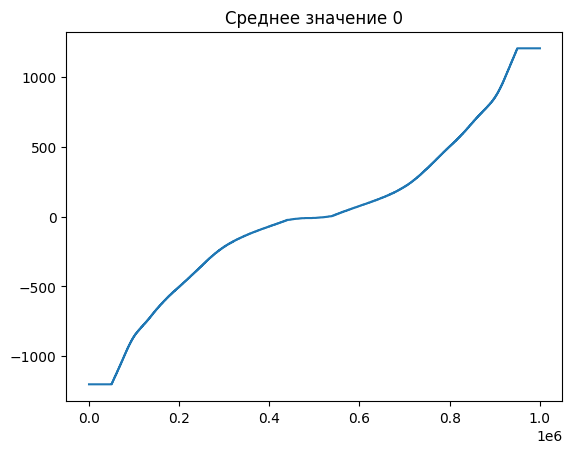

In [ ]:
print(f"mean: {eval.mean()}")
eval = eval - eval.mean()

plt.title("Среднее значение 0")
_ = plt.plot(eval)

div: 1206.690616461706


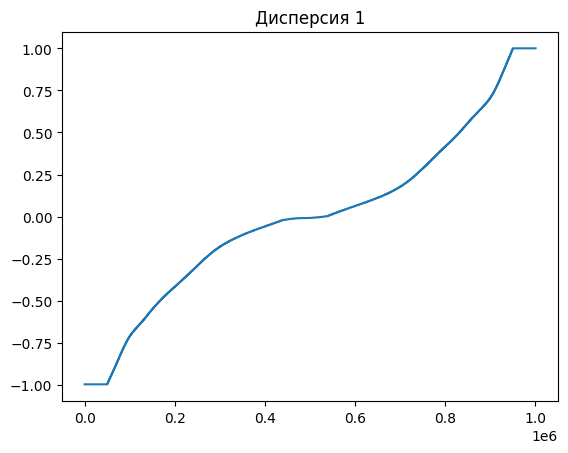

In [ ]:
print(f"div: {eval.max()}")
eval = eval / eval.max()

plt.title("Дисперсия 1")
_ = plt.plot(eval)

Summary:
	min - -0.9963619789508577
	max - 0.9999917129361068
	mean - -5.108657546075014e-07


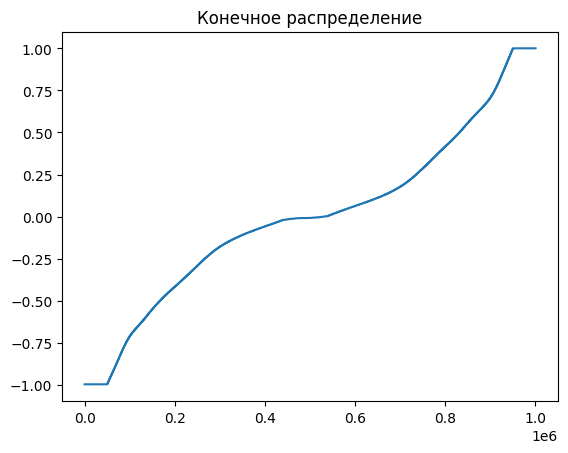

In [ ]:
# Итоговая функция нормализации
def normalize(data):
    data[data < -1192] = -1192
    data[data >  1217] =  1217

    data = data - 10.31
    data = data / 1206.7

    return data

data = pd.read_csv("data/random_evals.csv").Evaluation
data = data.apply(lambda x: int(x.replace("#", "").replace("\ufeff", "")))
data = data.sort_values().to_numpy()
data = normalize(data)

print("Summary:")
print(f"\tmin - {data.min()}")
print(f"\tmax - {data.max()}")
print(f"\tmean - {data.mean()}")

plt.title("Конечное распределение")
_ = plt.plot(data)